# Spam E-Mail Sınıflandırma Projesi

## Hazır Veri Setini Okumak
Hazır veri seti olarak, Kaggle sitesinde bulunan "Ling-Spam Dataset" veri setini kullandım.

In [1]:
import pandas as pd 

# Hazır veri setini bir pandas dataFrame yapısına aktarıyorum
df=pd.read_csv('C:/Users/Talha/Desktop/spam_filter/veri_seti/messages.csv')
df.head()  # Okumayı kontrol etmek ve veri setimizi incelemek adına ilk 5 veriye bakalım


,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,NaN,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0


Veri setinde 3 nitelik bulunuyor. Subject(Mail Başlığı), Message(Mail İçeriği), Label(Etiket => 0=Spam Değil,1=Spam Mail) 

### Ana veriyi bozmamak için kopya veri yapısı oluşturma

In [2]:
df_t = df.copy()  # Bu kopya üzerinde işlemler yürütülecek
df_t.head()

,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,NaN,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0


## Tutarsızlığı önleme

- Büyük harf/küçük harf kullanımlarından kaynaklanan veri tutarsızlıklarını gidermek için bütün karakterleri küçük harfe dönüştürdüm.

In [3]:
df_t['message'] = df_t['message'].str.lower() 
#Örneğin, "Hello" ve "hello" mesajları,  büyük harf/küçük harf farklılığı nedeniyle iki farklı kelime gibi işlem görebilir. 
#Bu sayede hem tutarsızlık önlenir hem de performans artar.

## Eksik Verilerin Giderilmesi

In [4]:
df.isnull().sum() #Eksik verilerin toplamı incelenir

subject    62
message     0
label       0
dtype: int64

Toplamda **62** tane eksik veril olduğu görülür. Eksik veriler sadece *subject* niteliğinde bulunuyor.

### Eksik veriler, **en sık** tekrar eden veri ile güncellenir.

En sık tekrar eden veri, eksik değerleri doldurmak için kullanılan popüler bir yöntemdir.
Bu yöntem, bir veri kümesindeki eksik değerlerin **olası en küçük değişikliği içermesini sağlar** ve verilerin dağılımını bozmaz.

Veri eksikliği sadece *subject* niteliği altında olduğu için sadece **subject niteliğine özgü** güncelleme yapılır.

In [5]:
df_t.fillna(df_t['subject'].mode().values[0],inplace=True)
 # NaN değerleri, df_t veri setinin mail başlığı kısmındaki (mod)en sık tekrar eden "mode[0]" değeri ile değiştir.
df_t.isnull().sum() # Eksik verilerin kontrolü

subject    0
message    0
label      0
dtype: int64

# Yeni Özellik Yaratma / Özellik Mühendisliği 

 - "*subject*" niteliği  e-posta konusunu açıklar, "*message*" niteliği ise e-posta içeriğini tanımlar. Bu iki **nitelik/özellik** birleştirilerek "*sub_mssg*" özelliği oluşturulur, veriler daha anlamlı ve işlevsel hale getirilmiş olur. Bu yeni nitelik içinde  daha verimli şekilde anahtar kelimeler bulunabilir veya etiketleri/temaları belirlenebilir.

In [6]:
df_t['sub_mssg']=df_t['subject']+df_t['message']
df_t.head()

,subject,message,label,sub_mssg
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0,job posting - apple-iss research centercontent...
1,sociolinguistics,"lang classification grimes , joseph e . and ba...",0,"sociolinguisticslang classification grimes , j..."
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0,query : letter frequencies for text identifica...
3,risk,a colleague and i are researching the differin...,0,riska colleague and i are researching the diff...
4,request book information,earlier this morning i was on the phone with a...,0,request book informationearlier this morning i...


- **Mesajların uzunluk bilgisi**, *spam / ham ayrımı* yapmak için bir parametre olarak kullanılabilir. Bu yüzden yeni bir özellik olarak length niteliğini ekliyorum.

In [7]:
df_t['length']=df_t['sub_mssg'].apply(len)
df_t.head()

,subject,message,label,sub_mssg,length
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0,job posting - apple-iss research centercontent...,2895
1,sociolinguistics,"lang classification grimes , joseph e . and ba...",0,"sociolinguisticslang classification grimes , j...",1816
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0,query : letter frequencies for text identifica...,1485
3,risk,a colleague and i are researching the differin...,0,riska colleague and i are researching the diff...,328
4,request book information,earlier this morning i was on the phone with a...,0,request book informationearlier this morning i...,1070


# Veri Görselleştirme

- Hazır veri setindeki label özelliği spam ve spam olmayan  mailleri 1/0 olarak etiketliyor. Elimizde ne kadar spam ve spam olmayan verinin olduğunu daha iyi anlamak için veri görselleştirme yaptım.

 Sayılar : [Spam Değil, Spam Mail] = [2412, 481]


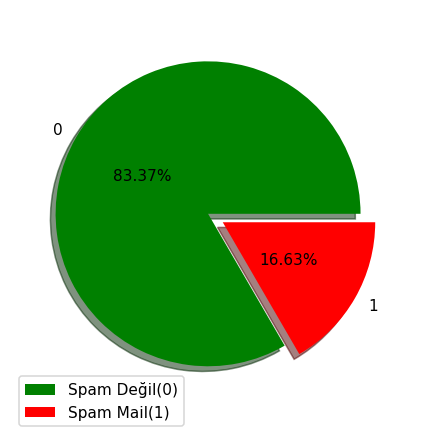

In [8]:
import matplotlib.pyplot as plt 

#  " .index " Eşsiz kayıtları döndürür. 0 ve 1 den başka veri olup olmadığını da kontorl etmiş oluruz.
etiketler = df_t['label'].value_counts().index.tolist()
# " .values " Eşsiz kayıtların sayısını hesaplar ve .tolist bu sayıların listesini oluşturur.
miktarlar = df_t['label'].value_counts().values.tolist()
print(f" Sayılar : [Spam Değil, Spam Mail] = {miktarlar}")

aciklik=(0.10,0)
renkler=('green','red')
plt.figure(figsize=(10,5),dpi=110)
plt.pie(x=miktarlar,explode=aciklik,labels=etiketler,colors=renkler,autopct='%.2f%%',pctdistance=0.5, shadow=True,radius=0.9)
plt.legend(["Spam Değil(0)",'Spam Mail(1)'])
plt.show()

# Veri Ön İşleme

Veri ön işleme adımında amaç,  verileri işlenebilir hale getirmektir. Bu işlemler neticesinde makine öğrenimi modelleri ile verilerimizin analizinin yapılması sağlanacak.

- Verilerin içeriği:

In [9]:
df_t['message'][8] 

"content - length : 1937 greetings ! i ' m wondering if someone out there can identify the languages used in two recent ibm commercials . they have out a series of three ads with people in different countries talking about ibm equipment and services . one ad has two old gentlemen walking along what looks like the seine , speaking french . a second ad has two men sitting in what is apparently a middle eastern marketplace , and a third ad has nuns discussing ibm equipment on their way to mass . i assume the men are speaking arabic ( though i would be grateful to have that confirmed ) , but i have no idea what the nuns are speaking . anyone know ? i would also like to take this opportunity to thank all those who responded to my questions early last year about some french , italian and swedish expressions in some print ads . i meant to send individual thanks , but i lost the file in which i had the respondents ! please forgive me , and accept this general acknowledgment instead . if any of

## Metin Normalizasyonu

Metinlerin işlenebilirliğini artırmak için ingilizcede bulunan özel durumların mormalizasyonu sağlanmalıdır. Bunu yapmak için *regular expression* modülü olan **re** kütüphanesinden yaralanıyorum.

In [10]:
# df_t.loc[df_t['message'].str.contains("aranan_ifade")].index    

df_t.loc[df_t['message'].str.contains("n\'t")].index

Int64Index([   2,    3,   15,   16,   21,   27,   35,   38,   68,   70,
            ...
            2863, 2867, 2869, 2870, 2871, 2882, 2885, 2886, 2890, 2891],
           dtype='int64', length=541)

In [11]:
import re

In [12]:
def normz(ifade):
    # ('t)(not) kısaltması için öncelikli olarak incelemesi gereken ifadeler
    ifade = re.sub(r"won't", "will not", ifade)
    ifade = re.sub(r"can't", "can not", ifade)
    ifade = re.sub(r"won\'t", "will not", ifade)
    ifade = re.sub(r"can\'t", "can not", ifade)
    # varsayılan özel durumlar
    ifade = re.sub(r"n\'t", " not", ifade)
    ifade = re.sub(r"\'re", " are", ifade)
    ifade= re.sub(r"\'s", " is", ifade)
    ifade = re.sub(r"\'d", " would", ifade)
    ifade = re.sub(r"\'ll", " will", ifade)
    ifade = re.sub(r"\'t", " not", ifade)
    ifade = re.sub(r"\'ve", " have", ifade)
    ifade = re.sub(r"\'m", " am", ifade)
    # boşluk bırakılan durumlar
    ifade = re.sub(r"n\' t", " not", ifade)
    ifade = re.sub(r"\' re", " are", ifade)
    ifade = re.sub(r"\' s", " is", ifade)
    ifade = re.sub(r"\' d", " would", ifade)
    ifade = re.sub(r"\' ll", " will", ifade)
    ifade = re.sub(r"\' t", " not", ifade)
    ifade = re.sub(r"\' ve", " have", ifade)
    ifade = re.sub(r"\' m", " am", ifade)
    return ifade

**normz** fonksiyonunda, özel durumlu kısaltmalar işlenebilirliği daha yüksek kelimelere güncellenerek geri döndürülür. Bu foknsiyonun uygulanması ile işlenebilirlik artar, veri tutarsızlığı önlenir ve performans artırılır.

In [13]:
df_t['sub_mssg'][3] 

"riska colleague and i are researching the differing degrees of risk perceived by our hong kong students in different contexts where spoken english is required . we would be interested to find out more about research in the area of risk-taking in language learning . so far we have n't come up with much . can anyone help here ?\n"

In [14]:
df_t['sub_mssg'] = df_t['sub_mssg'].apply(normz)
df_t['sub_mssg'][3] 

'riska colleague and i are researching the differing degrees of risk perceived by our hong kong students in different contexts where spoken english is required . we would be interested to find out more about research in the area of risk-taking in language learning . so far we have  not come up with much . can anyone help here ?\n'

## Metin Temizleme

 Metin temizleme, verilerdeki gereksiz karakterler, noktalama işaretleri, sayılar, bağlaçlar gibi unsurların temizlenmesidir.

In [15]:
df['message'][0] 

"content - length : 3386 apple-iss research center a us $ 10 million joint venture between apple computer inc . and the institute of systems science of the national university of singapore , located in singapore , is looking for : a senior speech scientist - - - - - - - - - - - - - - - - - - - - - - - - - the successful candidate will have research expertise in computational linguistics , including natural language processing and * * english * * and * * chinese * * statistical language modeling . knowledge of state-of - the-art corpus-based n - gram language models , cache language models , and part-of - speech language models are required . a text - to - speech project leader - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - the successful candidate will have research expertise expertise in two or more of the following areas : computational linguistics , including natural language parsing , lexical database design , and statistical language modeling ; text tokenization and

### Sayısal İfadeleri Temizleme

In [16]:
df_t['sub_mssg'] = df_t['sub_mssg'].str.replace(r'\d+(\.\d+)?', 'numbers', regex=True)
df_t['sub_mssg'][0]

'job posting - apple-iss research centercontent - length : numbers apple-iss research center a us $ numbers million joint venture between apple computer inc . and the institute of systems science of the national university of singapore , located in singapore , is looking for : a senior speech scientist - - - - - - - - - - - - - - - - - - - - - - - - - the successful candidate will have research expertise in computational linguistics , including natural language processing and * * english * * and * * chinese * * statistical language modeling . knowledge of state-of - the-art corpus-based n - gram language models , cache language models , and part-of - speech language models are required . a text - to - speech project leader - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - the successful candidate will have research expertise expertise in two or more of the following areas : computational linguistics , including natural language parsing , lexical database design , and statis

### Diğer Gereksiz İfadeleri Temizleme

 Bu değişiklikler, metinlerin daha temiz bir hale getirilmesine ve analiz edilmesine yardımcı olur.

In [17]:

df_t['sub_mssg']=df_t['sub_mssg'].str.lower() # Küçük harfe dönüştürme

df_t['sub_mssg']=df_t['sub_mssg'].str.replace(r'\n'," ",regex=True) # satır başı karakterlerini boşluk karakteriyle değiştirir

df_t['sub_mssg']=df_t['sub_mssg'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','MailID',regex=True) #  xyz@xmail.com -> MailID

df_t['sub_mssg']=df_t['sub_mssg'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','Links',regex=True) # abc.com -> Links

df_t['sub_mssg']=df_t['sub_mssg'].str.replace(r'£|\$', 'Money',regex=True)  # Para birimi karakterleri -> Money

df_t['sub_mssg']=df_t['sub_mssg'].str.replace(r'\s+', ' ',regex=True)  # Birden fazla boşluk karakteri

df_t['sub_mssg']=df_t['sub_mssg'].str.replace(r'^\s+|\s+?$', '',regex=True) # Başta ve sonda bulunan birden fazla boşluk

df_t['sub_mssg']=df_t['sub_mssg'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','contact number',regex=True)#0850... -> contact number

df_t['sub_mssg']=df_t['sub_mssg'].str.replace(r"[^a-zA-Z0-9]+", " ",regex=True) #  Alfanumerik olmayan karakterler

In [18]:
df_t['sub_mssg'][1]

'sociolinguisticslang classification grimes joseph e and barbara f grimes ethnologue language family index pb isbn numbers numbers numbers numbers vi numbers pp Money numbers numbers summer institute of linguistics this companion volume to ethnologue languages of the world twelfth edition lists language families of the world with sub groups shown in a tree arrangement under the broadest classification of language family the language family index facilitates locating language names in the ethnologue making the data there more accessible internet academic books sil org languages reference lang culture gregerson marilyn ritual belief and kinship in sulawesi pb isbn numbers numbers numbers numbers ix numbers pp Money numbers numbers summer institute of linguistics seven articles discuss five language groups in sulawesi indonesia the primary focus is on cultural matters with some linguistic content topics include traditional religion and beliefs certain ceremonies and kinship internet acade

Bu şekilde verilerimizin işlenebilirliği yükseldi.

In [19]:
df_t.head()

,subject,message,label,sub_mssg,length
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0,job posting apple iss research centercontent l...,2895
1,sociolinguistics,"lang classification grimes , joseph e . and ba...",0,sociolinguisticslang classification grimes jos...,1816
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0,query letter frequencies for text identificati...,1485
3,risk,a colleague and i are researching the differin...,0,riska colleague and i are researching the diff...,328
4,request book information,earlier this morning i was on the phone with a...,0,request book informationearlier this morning i...,1070


## Metin Dönüştürme

İlk olarak basit bir metin dönüştürme yöntemi olan **Stopwords** yöntemini uygulayacağım. Stopwords, metindeki yaygın kelimeleri (örneğin "the", "and", "in" gibi) çıkarmak için kullanılır ve makine öğrenimi modelleri tarafından kullanılmayan, anlamsız kelimeleri temizlemek için tasarlanmıştır.

In [20]:

import nltk
from nltk.corpus import stopwords 
# Stop words, dilbilgisi açısından önemli olmayan kelimelerdir ve bir metnin anlamını 
# belirleyen önemli kelimeler değildir.Örneğin, İngilizce stop words listesinde "the", "and", "a", "an", "in" vb.

# nltk.download('stopwords') # Stopwords dosyasının indirilmesi, indirilip yorum satırı haline getirildi

# stop words verilerini içeren nesneyi oluşturma:
stop = stopwords.words('english')

# stopwords'ları silme ve yeni özellik oluşturma:
df_t['Cleaned_Text'] = df_t['sub_mssg'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [21]:
df_t.head()

,subject,message,label,sub_mssg,length,Cleaned_Text
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0,job posting apple iss research centercontent l...,2895,job posting apple iss research centercontent l...
1,sociolinguistics,"lang classification grimes , joseph e . and ba...",0,sociolinguisticslang classification grimes jos...,1816,sociolinguisticslang classification grimes jos...
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0,query letter frequencies for text identificati...,1485,query letter frequencies text identificationi ...
3,risk,a colleague and i are researching the differin...,0,riska colleague and i are researching the diff...,328,riska colleague researching differing degrees ...
4,request book information,earlier this morning i was on the phone with a...,0,request book informationearlier this morning i...,1070,request book informationearlier morning phone ...


In [22]:
df_t['clean_length']=df_t['Cleaned_Text'].apply(len)
df_t.head()

,subject,message,label,sub_mssg,length,Cleaned_Text,clean_length
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0,job posting apple iss research centercontent l...,2895,job posting apple iss research centercontent l...,2108
1,sociolinguistics,"lang classification grimes , joseph e . and ba...",0,sociolinguisticslang classification grimes jos...,1816,sociolinguisticslang classification grimes jos...,1506
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0,query letter frequencies for text identificati...,1485,query letter frequencies text identificationi ...,1148
3,risk,a colleague and i are researching the differin...,0,riska colleague and i are researching the diff...,328,riska colleague researching differing degrees ...,214
4,request book information,earlier this morning i was on the phone with a...,0,request book informationearlier this morning i...,1070,request book informationearlier morning phone ...,653


Elimde toplamda 3 tane uzunluk parametresi oluştu. length, orijinal uzunluk. prep_length, gereksiz karakterlerin kaldırıldığı mesaj uzunluğu. clean_length, hem gereksiz karakterlerin hem de manasız kelimelerin kaldırıldığı mesaj uzunluğunu ifade ediyor.

Artık elimde, tamamen ön işleme adımlarından geçirilmiş bir mesaj içeriği olduğu için diğer mesaj niteliklerini veri setinden çıkarıyorum.

In [23]:
df_t.drop('subject',axis=1,inplace=True)
df_t.drop('message',axis=1,inplace=True)
df_t.drop('sub_mssg',axis=1,inplace=True)
df_t.rename(columns={'length': 'orj_length'}, inplace=True)
df_t.head()

,label,orj_length,Cleaned_Text,clean_length
0,0,2895,job posting apple iss research centercontent l...,2108
1,0,1816,sociolinguisticslang classification grimes jos...,1506
2,0,1485,query letter frequencies text identificationi ...,1148
3,0,328,riska colleague researching differing degrees ...,214
4,0,1070,request book informationearlier morning phone ...,653


In [24]:
df['message'][38] # orijinal içerik ile arakadaki farkı görmek için df_t['Cleaned_Text'][38] içeriğini çağıralım
#df_t['Cleaned_Text'][38]

'note : we do not wish to send e-mail to anyone that does not want it so please send an e-mail to : remove929 @ yahoo . com you will be removed promptly . * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * " the internet success toolbox " the most complete marketing software package available anywhere ! this is what you will receive on cd-rom : 1 . stealth mass mailer ( $ 399 . 00 value ) - this unique , first of it \'s kind - software that allows you to easily send 250 , 000 e-mail messages an hour . simply enough by making a single connection to the internet using a standard modem , and connecting to either 20 different mail servers , or a single mail server 20 times . this , easy to use , software is designed for the basic computer user to understand . it \'s as easy as imputing the mail server , selecting the list of e-mail recipients to send to , inserting your e-mail address , adding your subject line 

Orijinal uzunluk ve temizlenmiş içeriğin uzunluğu arasındaki fark bize manasız ifadelerin sayısını verecektir. Spam mail içeriklerinde bulunan (!, $, 1-9, *, -) vb. ifadelerin sıklığının fazla olması, spam mail tespitinde yararlı bir parametre olarak kullanılabilir. Bu yüzden orj_length ve clean_length 'in farklarının alındığı yeni bir özellik oluşturacağım.

In [25]:
df_t['diff_length'] = df_t['orj_length'] - df_t['clean_length']
df_t.head()

,label,orj_length,Cleaned_Text,clean_length,diff_length
0,0,2895,job posting apple iss research centercontent l...,2108,787
1,0,1816,sociolinguisticslang classification grimes jos...,1506,310
2,0,1485,query letter frequencies text identificationi ...,1148,337
3,0,328,riska colleague researching differing degrees ...,214,114
4,0,1070,request book informationearlier morning phone ...,653,417


Artık diğer uzunluk verilerine ihtiyacım olmadığı için onları veri setinden çıkarıyorum.

In [26]:
df_t.drop('orj_length',axis=1,inplace=True)
df_t.drop('clean_length',axis=1,inplace=True)
df_t.head(3)

,label,Cleaned_Text,diff_length
0,0,job posting apple iss research centercontent l...,787
1,0,sociolinguisticslang classification grimes jos...,310
2,0,query letter frequencies text identificationi ...,337


### diff_length Özelliğinin İşlenebilirliği

İşlenebilirliği anlamak için doğrudan label özelliği ile arasındaki ilişkiyi göstren bir grafik oluşturdum.

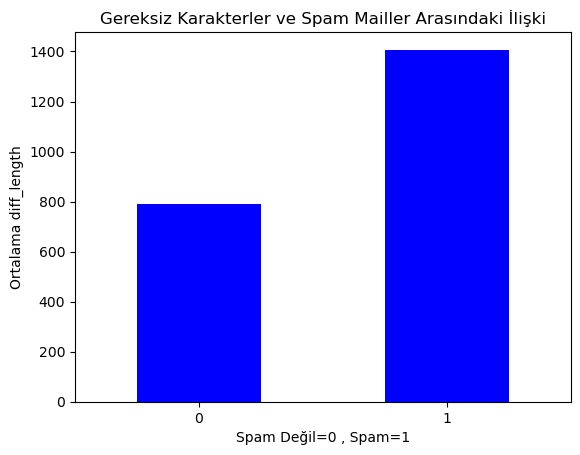

label
0     792.102819
1    1407.056133
Name: diff_length, dtype: float64


In [27]:
import pandas as pd
import matplotlib.pyplot as plt



# 'label' sütununa göre gruplama ve 'diff_length' ortalamasını alma
grouped = df_t.groupby('label')['diff_length'].mean()

# Grafik oluşturma
grouped.plot(kind='bar', color='blue')
plt.xlabel('Spam Değil=0 , Spam=1')
plt.ylabel('Ortalama diff_length')
plt.title('Gereksiz Karakterler ve Spam Mailler Arasındaki İlişki')
plt.xticks(rotation=0)
plt.show()
print(grouped)

Görüleceği üzere spam olan maillerin ortalama gereksiz karakter sayısının değeri 1400'ken spam olmayan maillerin ortalama gereksiz karakter sayısı 800. Bu durumda spam mailler ile diff_length özelliği arasında doğrudan bir ilişki bulunduğunu söyeleyebiliriz. Lakin sınıflandırmayı hazır fonksiyonlar aracılığı ile uygulayacağım bu istatistiği parametre olarak ekleyemedim.

## Metin Vektörleştirme

Metin vektörleştirme işlemi, metin verilerini sayısal vektörlere dönüştürmeyi sağlar. Bu dönüşüm, metinlerin makine öğrenimi algoritmaları tarafından işlenebilmesini sağlar. Ben TF-IDF yöntemini kullanacağım.

TF-IDF, bir belgedeki bir kelimenin önemini belirlemek için kullanılır. Bir kelimenin belgedeki sıklığı (Term Frequency - TF) ile belgedeki diğer belgelerde nadir görülme sıklığı (Inverse Document Frequency - IDF) arasındaki dengenin sağlanmasıyla kelimenin önemi belirlenir. Böylece, belirli bir belge içinde sık görülen ancak diğer belgelerde nadir olan kelimeler daha yüksek ağırlıkla temsil edilir.

Örneğin, bir belgede "apple" kelimesi 5 kez geçiyorsa, "apple" kelimesinin bu belgedeki terim sıklığı (TF değeri) 5 olacaktır.

Örneğin, "apple" kelimesi 100 belgede geçiyorsa ve toplamda 1000 belge varsa, "apple" kelimesinin ters belge frekansı (IDF değeri) log(1000/100) = 1 olarak hesaplanır.

Bir terimin TF-IDF değeri, TF değeriyle IDF değerinin çarpımıdır.
Örneğin, "apple" kelimesi belgede 5 kez geçiyorsa ve IDF değeri 1 ise, "apple" kelimesinin TF-IDF değeri 5 * 1 = 5 olur.

Bu değerler sayesinde, metinlerdeki kelimenin önemini yansıtan vektör temsilleri elde edilir. 

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

tvec = TfidfVectorizer() # TfidfVectorizer sınıfından bir örnek

## Test ve Eğitim Veri Setlerinin Hazırlanması

In [29]:
X = df_t['Cleaned_Text'] # Bağımsız Değişken # 2.893 Kayıt
Y = df_t['label'] # Bağımlı Değişken

from sklearn.model_selection import train_test_split


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.24, random_state=225, stratify=Y)


#  Metinleri eğitim ve test veri kümelerine bölmek için train_test_split fonksiyonunu kullanıyoruz. 
#  X ve Y verilerini belirtilen oranda bölerken, 
#  rastgele bir durum (random_state) belirliyoruz. 
#  Ayrıca, sınıfların dengeli bir şekilde bölünmesi için stratify parametresinin değerini Y olarak atıyoruz.

In [30]:
ham_count_train = (Y_train == 0).sum()
spam_count_train = (Y_train == 1).sum()

print("Eğitim Veri Seti:")
print("Ham Sayısı:", ham_count_train)
print("Spam Sayısı:", spam_count_train)
#2.198

Eğitim Veri Seti:
Ham Sayısı: 1833
Spam Sayısı: 365


In [31]:
ham_count_test = (Y_test == 0).sum()
spam_count_test = (Y_test == 1).sum()

print("Test Veri Seti:")
print("Ham Sayısı:", ham_count_test)
print("Spam Sayısı:", spam_count_test)
#695

Test Veri Seti:
Ham Sayısı: 579
Spam Sayısı: 116


## KNNeighbors Sınıflandırması

In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.pipeline import Pipeline
# KNN modelini oluşturma
knc = KNeighborsClassifier()
# Modeli eğitme
model_knn = Pipeline([('vectorizer',tvec),('classifier',knc)])
model_knn.fit(X_train,Y_train)

# Test verileri üzerinde tahmin yapma
y_pred_knn = model_knn.predict(X_test)
# Confusion matrix oluşturma ve raporlama
cm_knn = confusion_matrix(y_pred_knn,Y_test)
print(cm_knn)
print("Accuracy : ", accuracy_score(y_pred_knn,Y_test))
#695

[[560   7]
 [ 19 109]]
Accuracy :  0.962589928057554


C:\Users\Talha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


## SVM Sınıflandırması

In [52]:
from sklearn.svm import SVC
# SVM modelini oluşturma
svm = SVC()
model_svm = Pipeline([('vectorizer', tvec), ('classifier', svm)])

# Modeli eğitme
model_svm.fit(X_train, Y_train)

# Test verileri üzerinde tahmin yapma
y_pred_svm = model_svm.predict(X_test)

# Confusion matrix oluşturma ve görselleştirme
cm_svm = confusion_matrix(y_pred_svm,Y_test)
print(cm_svm)
print("Accuracy : ", accuracy_score(y_pred_svm,Y_test))

[[578  11]
 [  1 105]]
Accuracy :  0.9827338129496402


**Accuracy (Doğruluk) = (TP + TN) / (TP + TN + FP + FN)**: Accuracy, modelin doğru sınıflandırılan örneklerinin oranını temsil eder. Yani, doğru tahmin edilen örneklerin toplam örnek sayısına oranını gösterir. Bu metrik, sınıflandırma modelinin genel performansını değerlendirmek için kullanılır.


## Confusion Matrix Değerlerinin Görselleştirilmesi Ve İncelenmesi

### KNN Sınıflandırması İçin Confusion Matrix

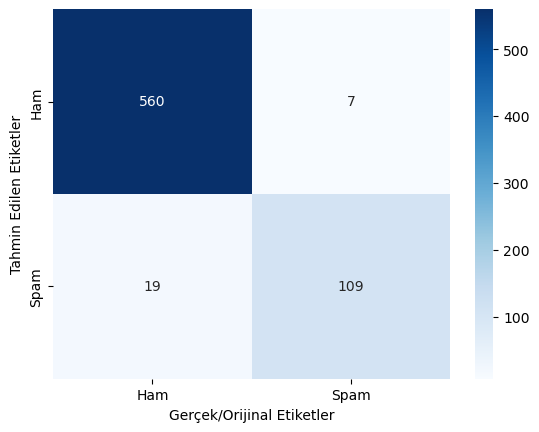

In [34]:
import seaborn as sns
class_names = ['Ham', 'Spam']
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues",xticklabels=class_names, yticklabels=class_names)
plt.ylabel("Tahmin Edilen Etiketler")
plt.xlabel("Gerçek/Orijinal Etiketler")
plt.show()
#695

- **TP (true positive)**: Spam olarak doğru tahmin edilen sayı (109)
- **FP (false positive)**: Spam olduğu halde yanlış(ham) tahmin edilen sayı (7)
- **TN (true negative)**: Ham olarak doğru tahmin edilen sayı (560)
- **FN (false negative)**: Ham olduğu halde yanlış(spam) edilen sayı (19)

### SVM Sınıflandırması İçin Confusion Matrix

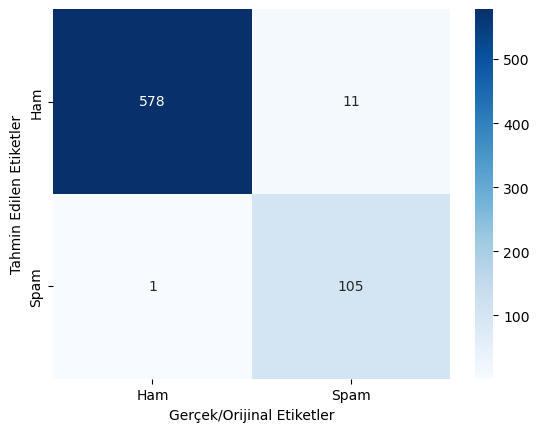

In [35]:
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues",xticklabels=class_names, yticklabels=class_names)
plt.ylabel("Tahmin Edilen Etiketler")
plt.xlabel("Gerçek/Orijinal Etiketler")
plt.show()

- **TP (true positive)**: Spam olarak doğru tahmin edilen sayı (105)
- **FP (false positive)**: Spam olduğu halde yanlış(ham) tahmin edilen sayı (11)
- **TN (true negative)**: Ham olarak doğru tahmin edilen sayı (578)
- **FN (false negative)**: Ham olduğu halde yanlış(spam) tahmin edilen sayı (1)

### Confusion Matrix Verilerinden Çıkan Fikir

KNN sınıflandırması, SVM sınıflandırmasına göre **sayısal olarak** spam mail tespitinde daha fazla doğru spam mail tespit etmesine rağmen ham ve spam mesajları SVM'ye göre daha çok **yanlış** kategorize ettiği için spam mail tespitinde **verimlilik bakımından** **SVM sınıflandırması daha başarılı** bir iş çıkarmıştır.

## Sınıflandırma Raporlarının Görselleştirilmesi ve Değerlendirilmesi

### KNN Sınıflandırması İçin Rapor Sonuçları

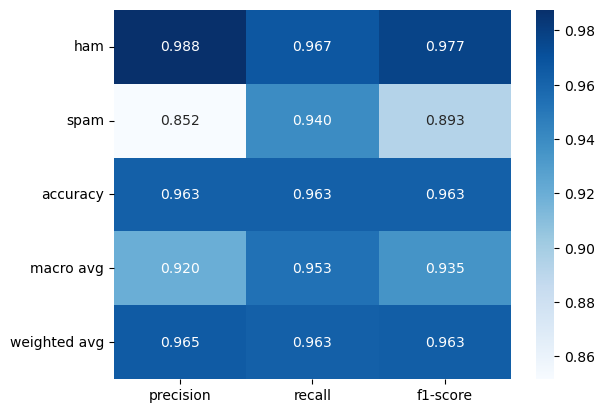

In [71]:
from sklearn.metrics import classification_report
class_names = ['ham', 'spam']

report_knn = classification_report(Y_test, y_pred_knn, target_names=class_names, output_dict=True)

sns.heatmap(pd.DataFrame(report_knn).iloc[:-1, :].T, annot=True, cmap="Blues",fmt='.3f')
plt.show()

### SVM Sınıflandırması İçin Rapor Sonuçları

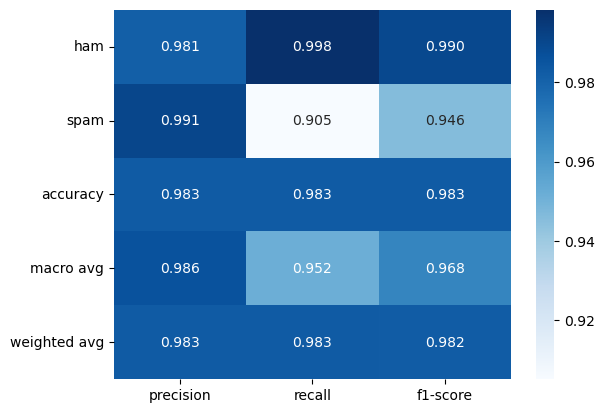

In [76]:
report_svm = classification_report(Y_test, y_pred_svm, target_names=class_names, output_dict=True)
sns.heatmap(pd.DataFrame(report_svm).iloc[:-1, :].T, annot=True, cmap="Blues",fmt='.3f')
plt.show()

## Raporların Değerlendirilmesi

**Accuracy (Doğruluk) = (TP + TN) / (TP + TN + FP + FN)**: Accuracy, modelin doğru sınıflandırılan örneklerinin oranını temsil eder. Yani, doğru tahmin edilen örneklerin toplam örnek sayısına oranını gösterir. Bu metrik, sınıflandırma modelinin genel performansını değerlendirmek için kullanılır.

**Precision (Hassasiyet) = TP / (TP + FP)**: Precision, pozitif olarak tahmin edilen örnekler ile gerçek pozitif örneklerin yüzdesini gösterir. Yani, bir sınıfın pozitif olarak tahmin edilen örneklerinin ne kadarının gerçekten o sınıfa ait olduğunu gösterir. Hassasiyet, yanlış pozitif tahminlerin az olduğu durumlarda yüksek değer alır.

**Recall (Geri Çağırma) = TP / (TP + FN)**: Recall, gerçek pozitif örnekler ile doğru pozitif olarak tahmin edilen örneklerin yüzdesini gösterir. Yani, bir sınıfa ait gerçek pozitif örneklerin ne kadarının doğru bir şekilde tahmin edildiğini gösterir. Geri çağırma, yanlış negatif tahminlerin az olduğu durumlarda yüksek değer alır.

### Doğruluk (Accuracy):

- KNN: 0.9626
- SVM: 0.9827

SVM modeli, doğruluk açısından KNN modeline göre daha yüksek bir performans sergilemektedir. Bu, SVM modelinin genel olarak daha doğru tahminler yaptığını gösterir.

### Hassasiyet (Precision):

- KNN - Spam: 0.8516
- SVM - Spam: 0.9906

SVM modeli, spam sınıfı için daha yüksek hassasiyet değerine sahiptir. Bu, SVM'in spam olarak tahmin ettiği örneklerin gerçekten spam olma olasılığının daha yüksek olduğunu gösterir. SVM, yanlış pozitiflerin sayısını azaltmada daha başarılıdır.

### Geri Çağırma (Recall):

- KNN - Spam: 0.9397
- SVM - Spam: 0.9052

KNN modeli, spam sınıfını geri çağırma açısından daha yüksek bir performans sergilemektedir. Bu, KNN'in gerçek spam örneklerinin daha büyük bir kısmını doğru bir şekilde tespit ettiğini gösterir.

### F1-Skoru:

- KNN - Spam: 0.8934
- SVM - Spam: 0.9459

SVM modeli, spam sınıfı için daha yüksek bir F1-skoruna sahiptir. Bu, SVM'in hem hassasiyeti hem de geri çağırma değerlerini dengeleyerek daha iyi bir performans sergilediğini gösterir.

### Sonuç
Genel olarak, SVM modeli KNN modeline göre daha yüksek hassasiyet ve F1-skoru değerlerine sahiptir. Bununla birlikte, KNN modeli spam sınıfı için daha yüksek geri çağırma değerine sahiptir. Bu, SVM modelinin spam e-postalarını daha iyi tespit edebilme yeteneğine sahip olduğunu gösterirken, KNN modelinin spam örneklerini kaçırma olasılığının daha düşük olduğunu gösterir.

Bu bilgilere dayanarak, SVM modelinin genel olarak spam tespitinde daha güçlü olduğunu söyleyebiliriz. Ancak, her iki modelin de farklı avantajları ve güçlü yanları bulunmaktadır.

### Spam / Ham Kesişim Değerlerinin Anlamları

**Precision-Spam Kesişimi**: Bu değer, "spam" sınıfının doğru pozitif tahminlerinin, toplam "spam" tahminlerine oranını temsil eder. Yani, spam olarak tahmin edilen örneklerin ne kadarının gerçekten spam olduğunu gösterir.

**Precision-Ham Kesişimi**: Bu değer, "ham" sınıfının doğru pozitif tahminlerinin, toplam "ham" tahminlerine oranını temsil eder. Yani, ham olarak tahmin edilen örneklerin ne kadarının gerçekten ham olduğunu gösterir.

**Recall-Spam Kesişimi**: Bu değer, "spam" sınıfının doğru pozitif tahminlerinin, toplam gerçek "spam" örneklerine oranını temsil eder. Yani, gerçek spam örneklerinin ne kadarının doğru bir şekilde tahmin edildiğini gösterir.

**Recall-Ham Kesişimi**: Bu değer, "ham" sınıfının doğru pozitif tahminlerinin, toplam gerçek "ham" örneklerine oranını temsil eder. Yani, gerçek ham örneklerinin ne kadarının doğru bir şekilde tahmin edildiğini gösterir.

**F1-Score-Spam Kesişimi**: Bu değer, "spam" sınıfının hassasiyet (precision) ve geri çağırma (recall) değerlerinin harmonik ortalamasını temsil eder. Bu, spam sınıfının doğru pozitif tahminlerinin yanı sıra yanlış pozitif ve yanlış negatif tahminlerin de dikkate alındığı bir denge metriğidir.

**F1-Score-Ham Kesişimi**: Bu değer, "ham" sınıfının hassasiyet (precision) ve geri çağırma (recall) değerlerinin harmonik ortalamasını temsil eder. Bu, ham sınıfının doğru pozitif tahminlerinin yanı sıra yanlış pozitif ve yanlış negatif tahminlerin de dikkate alındığı bir denge metriğidir.

### Oran/Yüzde/Ortalama Kesişim Değerlenin Anlamları

**Accuracy - Precision**: Bu değer, doğru pozitif tahminlerin toplam pozitif tahminlere oranını temsil eder. Yüksek bir hassasiyet değeri, yanlış pozitif tahminlerin az olduğunu gösterir. Accuracy, doğru bir şekilde sınıflandırılan örneklerin toplam örnek sayısına oranını gösterir.

**Accuracy - Recall**: Bu değer, doğru pozitif tahminlerin gerçek pozitif örneklerin yüzdesini temsil eder. Yüksek bir geri çağırma değeri, yanlış negatif tahminlerin az olduğunu gösterir. Accuracy, doğru bir şekilde sınıflandırılan örneklerin toplam örnek sayısına oranını gösterir.

**Accuracy - F1-Score** Kesişimi: Bu değer, hassasiyet (precision) ve geri çağırma (recall) değerlerinin harmonik ortalamasını temsil eder. Bu metrik, hem hassasiyeti hem de geri çağırma değerini dikkate alarak bir denge sağlar. Accuracy, doğru bir şekilde sınıflandırılan örneklerin toplam örnek sayısına oranını gösterir.

**Weighted Avg - Precision**: Ağırlıklı ortalama olarak hesaplanan hassasiyet (precision) değeri. Bu, tüm sınıfların tahminlerine göre hesaplanan ve sınıflar arasındaki örnek sayılarına dayalı olarak ağırlıklandırılan bir ortalama değerdir.

**Weighted Avg - Recall**: Ağırlıklı ortalama olarak hesaplanan geri çağırma (recall) değeri. Bu, tüm sınıfların tahminlerine göre hesaplanan ve sınıflar arasındaki örnek sayılarına dayalı olarak ağırlıklandırılan bir ortalama değerdir.

**Weighted Avg - F1-Score**: Ağırlıklı ortalama olarak hesaplanan F1 skoru. Bu, tüm sınıfların tahminlerine göre hesaplanan ve sınıflar arasındaki örnek sayılarına dayalı olarak ağırlıklandırılan bir ortalama değerdir.

**Macro Avg - Precision**: Makro ortalama olarak hesaplanan hassasiyet (precision) değeri. Bu, tüm sınıfların hassasiyet değerlerinin aritmetik ortalamasını temsil eder. Her sınıfın performansı aynı ağırlığa sahiptir.

**Macro Avg - Recall**: Makro ortalama olarak hesaplanan geri çağırma (recall) değeri. Bu, tüm sınıfların geri çağırma değerlerinin aritmetik ortalamasını temsil eder. Her sınıfın performansı aynı ağırlığa sahiptir.

**Macro Avg - F1-Score**: Makro ortalama olarak hesaplanan F1 skoru. Bu, tüm sınıfların F1 skorlarının aritmetik ortalamasını temsil eder. Her sınıfın performansı aynı ağırlığa sahiptir.

# Optimizasyon İçin Yapılabilecek Seçenekler

1 - **Model Parametrelerini Ayarlama(Hiperparametre)**: Sınıflandırma algoritmalarının belirli parametreleri vardır, örneğin KNN için komşu sayısı (n_neighbors) veya uzaklık ölçütü (metric). Bu parametreleri değiştirerek farklı değerleri deneyebilir ve modelin performansını kontrol edebiliriz.

2 - **Yeni Veri Önişleme adımları** ekleyebilir veya adımları **iyileştirebiliriz**.

3 - **Yeni Özellik Seçim**i veya **Öznitelik Mühendisliği** kullanarak eyni özellik orataya çıkarabilriiz.

4 - **Model Ensamblesi**: Birden fazla modeli birleştirerek bir ensemble modeli oluşturabilirsiniz. Bu, modelin daha iyi genelleme yapmasına ve daha iyi performans elde etmesine yardımcı olabilir. Örneğin, SVM ile birlikte başka bir algoritma kullanarak ensemble modeli oluşturabiliriz.

5 - **Cross-Validation**: Modelin performansını daha güvenilir bir şekilde değerlendirmek için çapraz doğrulama (cross-validation) yöntemlerini kullanabiliriz. Bu, veri setini farklı parçalara böler ve modeli her bir parça üzerinde eğitip test ederek genel performansı değerlendirmenizi sağlar.


### **Hiperparametre optimizasyonu** için bazı yöntemler;

**Grid Search**: Grid search, belirli bir parametre kombinasyonu kümesini deneyerek en iyi performansı elde etmeyi amaçlar. Grid search, tüm parametre kombinasyonlarını sırayla deneyerek en iyi sonucu veren hiperparametreleri belirler.

**Random Search**: Random search, belirli bir parametre dağılımı içinden rastgele seçilen parametre değerlerini deneyerek en iyi sonucu elde etmeyi amaçlar. Bu yöntemde, parametre kombinasyonlarını rastgele seçmek ve test etmek için belirli bir sayıda deneme yapılır.

**Bayes Optimize**: Bayes optimize, önceki deneyimlere dayalı olarak parametrelerin hangi değerlerinin daha iyi sonuç vereceğini tahmin eden bir model kullanır. Bu tahminlerle birlikte yeni parametre kombinasyonları seçilerek en iyi sonuca ulaşılır.

Bu teknikleri, **Grid Search ve Random Search, scikit-learn** gibi makine öğrenimi kütüphanelerini kullanarak kolayca uygulayabiliriz.

## SVM Sınıflandırmasında Bulunan Önemli Parametreler ve Varsayılan Değerleri

**C**: Bu parametre, SVM'nin hata toleransını kontrol eder. C değeri ne kadar büyükse, modelin daha az hata toleransı gösterdiği anlamına gelir. Yani, büyük bir C değeri sınıflandırma hatasına daha az izin verirken, küçük bir C değeri daha fazla hata tolere eder. Bu parametre, modelin aşırı uyma (overfitting) veya aşırı genelleme (underfitting) yapma yeteneğini etkiler. **C değeri üzerindeki ayarlamalar, modelin sınıflandırma hatasını azaltmak veya veriye daha fazla uyum sağlamak için yapılır**.Varsayılan değeri 1.0'dır.

**kernel**:  SVM'nin çekirdek fonksiyonunu belirler. **Çekirdek fonksiyonu, verileri yüksek boyutlu uzayda dönüştürerek doğrusal olarak ayrılabilir hale getiri**r. Varsayılan olarak "rbf" (Radial Basis Function) çekirdeği kullanılır, çünkü non-lineer karar sınırlarını modellerken etkilidir. Farklı çekirdekler arasında "linear", "poly" (polinom), "sigmoid" gibi seçenekler bulunur. Hangi çekirdek fonksiyonunun kullanılacağı, veri setinin doğası ve sınıflandırma probleminin gereksinimlerine bağlıdır.

**gamma**: Gamma parametresi, rbf, poly ve sigmoid çekirdeklerinde kullanılır. Varsayılan olarak "scale" değeri kullanılır, bu da gamma değerini 1 / (n_features * X.var()) formülüyle hesaplar. **Gamma, çekirdek fonksiyonunun esnekliğini kontrol eder. Küçük bir gamma değeri, geniş bir etki alanı sağlar ve daha düzgün bir sınıflandırma yapar. Büyük bir gamma değeri, verilere daha yakın noktalara odaklanır ve karmaşık, kıvrımlı sınıflandırma bölgeleri oluşturur.** Gamma değeri üzerinde yapılan ayarlamalar, modelin aşırı uyma veya aşırı genelleme eğilimini etkiler. Varsayılan değeri "scale" olarak belirlenmiştir. 

**degree**: **Degree parametresi, polinom çekirdeği kullanıldığında polinomun derecesini belirler.** Varsayılan değeri 3'tür, yani üçüncü dereceden bir polinom kullanılır. Polinom çekirdeği, non-lineer sınıflandırma problemlerini ele almak için kullanılır. Derece değeri arttıkça, polinomun karmaşıklığı ve esnekliği artar. Ancak çok yüksek dereceli polinomlar kullanmak, aşırı uyma sorununa yol açabilir. Derece değeri, sınıflandırma probleminin karmaşıklığına ve veri setinin doğasına bağlı olarak seçilir.

### RandomizedSearch ile En Optimum SVM Parametrelerini Bularak Modeli Optimize Etme

In [56]:
from sklearn.model_selection import RandomizedSearchCV
X_train_tfidf = tvec.fit_transform(X_train)
X_test_tfidf = tvec.transform(X_test)


# Hiperparametrelerin değer aralığını belirleme
param_dist = {
    'C': [0.1, 1.0, 1.5, 10.0],
    'gamma': [0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf']
}

# RandomizedSearchCV ile SVM özelinde hiperparametre optimizasyonu yapma
random_search = RandomizedSearchCV(svm, param_distributions=param_dist, cv=5, n_iter=10, random_state=42)
random_search.fit(X_train_tfidf, Y_train)

# En iyi parametreleri ekrana bastıralım
best_params = random_search.best_params_
print("En iyi parametreler: ", best_params)


# En iyi parametreleri bulunan SVM modelini kullanarak tahmin yapma
y_pred_best = random_search.predict(X_test_tfidf)

# Model performansını değerlendirme
cm_best = confusion_matrix(y_pred_best, Y_test)
accuracy_best = accuracy_score(y_pred_best, Y_test)

print("Confusion Matrix:")
print(cm_best)
print("Accuracy: ", accuracy_best)

En iyi parametreler:  {'kernel': 'linear', 'gamma': 0.01, 'C': 1.0}
Confusion Matrix:
[[578   5]
 [  1 111]]
Accuracy:  0.9913669064748202


## Optimum Değerleri Bulunan SVC Parametreleri İle Modeli Eğitme

In [57]:
svm = SVC(kernel='linear', gamma=0.01, C=1.5) # Optimum Değerler 
# C değerini 1.5 yaptım çünkü sadece C için optimum değer arandığında 1.5 ve 10 değerleri daha iyi sonuç veriyor.
model_best_svm = Pipeline([('vectorizer', tvec), ('classifier', svm)])
# Modeli eğitme
model_best_svm.fit(X_train, Y_train)

# Test verileri üzerinde tahmin yapma
y_pred_best_svm = model_best_svm.predict(X_test)

# Confusion matrix oluşturma ve görselleştirme
cm_best_svm = confusion_matrix(y_pred_best_svm,Y_test)
print(cm_best_svm)
print("Accuracy : ", accuracy_score(y_pred_best_svm,Y_test))

[[578   4]
 [  1 112]]
Accuracy :  0.9928057553956835


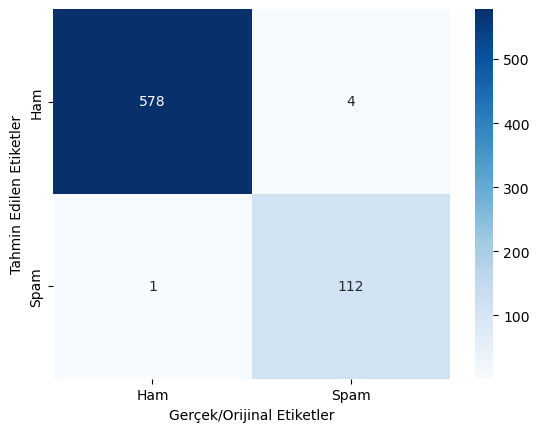

In [40]:
class_names = ['Ham', 'Spam']
sns.heatmap(cm_best_svm, annot=True, fmt="d", cmap="Blues",xticklabels=class_names, yticklabels=class_names)

plt.ylabel("Tahmin Edilen Etiketler")
plt.xlabel("Gerçek/Orijinal Etiketler")
plt.show()
#[[578  11] Optimize Edilmemiş Confusion matrix değerleri
#[  1 105]]


- **TP (true positive)**: Spam olarak doğru tahmin edilen sayı (112)
- **FP (false positive)**: Spam olduğu halde yanlış(ham) tahmin edilen sayı (4)
- **TN (true negative)**: Ham olarak doğru tahmin edilen sayı (578)
- **FN (false negative)**: Ham olduğu halde yanlış(spam) tahmin edilen sayı (1)

## Optimize Edilmiş ve Edilmemiş SVM Modellerinin Kıyaslanması

### Optimize Edilmiş SVM Modelinin Raporu

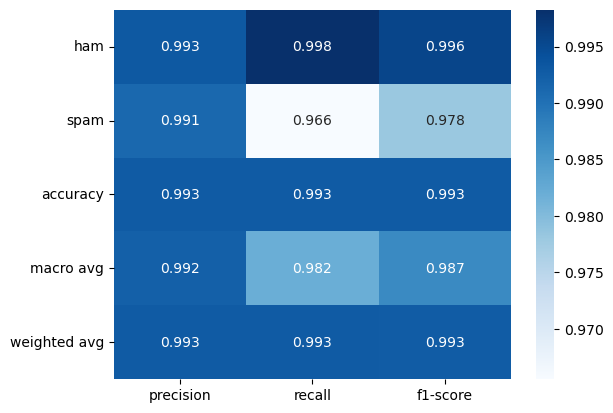

In [74]:
class_names = ['ham', 'spam']
report_best_svm = classification_report(Y_test, y_pred_best_svm, target_names=class_names, output_dict=True)
sns.heatmap(pd.DataFrame(report_best_svm).iloc[:-1, :].T, annot=True, cmap="Blues",fmt='.3f')
plt.show()

### Optimize Edilmemiş SVM Modelinin Raporu

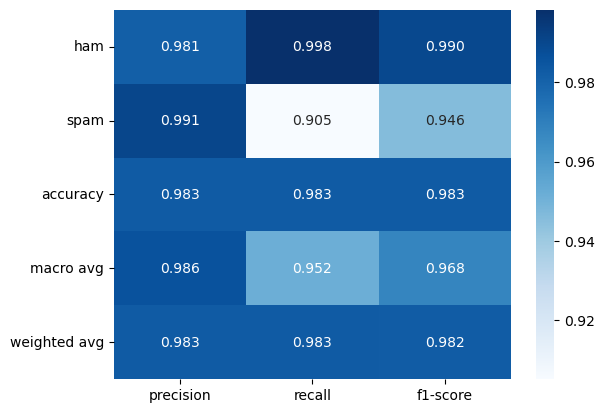

In [42]:
report_svm = classification_report(Y_test, y_pred_svm, target_names=class_names, output_dict=True)
sns.heatmap(pd.DataFrame(report_svm).iloc[:-1, :].T, annot=True, cmap="Blues",fmt='.3f')
plt.show()

## Raporların Değerlendirilmesi

**Hassasiyet (Precision)**: Optimizasyon sonucunda SVM modelinin ham sınıf için hassasiyeti varsayılan modele göre artmıştır. Bu, optimize edilmiş modelin ham sınıfı daha iyi tanıdığını ve ham etiketli örnekleri yanlış pozitif olarak sınıflandırma olasılığının daha düşük olduğunu gösterir. Spam sınıf için ise hassasiyet değeri hemen hemen aynı kalmıştır.

**Duyarlılık (Recall)**: Optimizasyon sonucunda SVM modelinin spam sınıfı için duyarlılığı artmıştır. Bu, optimize edilmiş modelin spam e-postalarını daha etkili bir şekilde tespit ettiği ve daha az yanlış negatif (gerçek spam olanları yanlışlıkla spam olmayan olarak sınıflandırma) yaptığını gösterir. Ham sınıf için duyarlılık değeri ise hemen hemen aynı kalmıştır.

**F1-Skoru**: Optimize edilmiş SVM modelinin ham sınıf için F1-skoru varsayılan modele göre artmıştır. Bu, optimize edilmiş modelin hem hassasiyeti hem de duyarlılığı daha iyi dengelediğini ve ham sınıfı daha iyi bir şekilde sınıflandırdığını gösterir. Spam sınıfı için F1-skoru ise hemen hemen aynı kalmıştır.

**Doğruluk (Accuracy)**: Optimize edilmiş SVM modelinin doğruluk değeri varsayılan modele göre artmıştır. Bu, optimize edilmiş modelin toplamda daha iyi bir performans sergilediğini ve doğru sınıflandırma oranının yükseldiğini gösterir.

**Sonuç olarak**, optimize edilmiş SVM modeli, ham sınıf için hassasiyet, spam sınıfı için duyarlılık ve genel doğruluk açılarından varsayılan modele göre daha iyi bir performans sergilemektedir. Bu optimizasyon, ham sınıfın daha iyi tanınması ve spam e-postalarının daha etkili bir şekilde tespit edilmesi gibi alanlarda modelin performansını artırmıştır.

# Son Aşama : Modelin Dış Kaynaklar Üzerinde Test Edilmesi

In [43]:
test1=model_best_svm.predict(["New Product Announcement: Introducing the XYZ Smartphone Discover the latest innovation in mobile technology with our new XYZ Smartphone. Pre-order now to be among the first to own it"])
print(test1[0])

0


In [44]:
#test2 = model_best_svm.predict([""])
test2 = model_best_svm.predict(["Free Trial: Try Our Exclusive Product Now! Experience the benefits of our revolutionary product with a free trial. Limited quantities available."])
print(test2[0])


1


In [45]:
test3 = model_best_svm.predict(["URGENT: Immediate Action Required!Your account has been compromised. Please click on the link to verify your information and secure your account."])
print(test3[0])

1


In [46]:
test4 = model_best_svm.predict(["Your microsoft account has been compromised ,you must update before or else your account going to close click to update"])
print(test4[0])

0


In [47]:
test5 = model_best_svm.predict(["How to write on-brand, factual articles with AI Article Writer 5.0? Hey Talha, Last week, we launched AI Article Writer 5.0: a personalized, factual, SEO article writer. And it ended being the #2 product of the day on Product Hunt. Thank you for your support! 🎉As our usual drill, it's time for a LIVE training session.So here's your invite to an exclusive session on – Using AI Article Writer 5.0 to craft on-brand, factual articles.In under an hour, I'll show you how to set up your brand voice, use document-based generation, and create SEO-optimized blog posts and articles that are super personalized & factually accurate. 🚀Click here to register📅 Mark your calendars...Date: June 15, 2023 Time: 12 pm EDT/EST (9.30 pm IST)Place: Zoom (link will be shared post-registration)Reserve your spot now!Moreover, we'll also have a QnA session where I'll answer all your questions in real time. That's not it. I'll also spill some beans on our upcoming launches.But here's the catch – spots are limited and filling up fast.Click here to claim your seat NOW! See you there. 👋Cheers,SamCEO & Founder @ WritesonicPS. Have a look at what people are saying about AI Article Writer 5.0 on Product Hunt.👇"])
print(test5[0])

0


In [48]:
test6 = model_best_svm.predict(["[Free Webinar] 8 Ways AI can Boost Your Business with No-code Hello Valued Appy Pie User,I hope this email finds you well. I wanted to extend a special invitation to you for an upcoming webinar that explores the exciting and powerful ways small businesses are utilizing AI to fuel their growth and success.Text to Image GeneratorText to Image Generator:It enables small businesses to instantly convert text prompts into visually striking images and create eye-catching graphics.Text to Animation MakerText to Animation Generator:It takes text inputs, understands the context and creates engaging animations that businesses can use as marketing collateral or publish on social channels. Animation maker is currently in alpha testing.Text to Logo GeneratorText to Logo Generator:It empowers small businesses to create stunning, professional logos in minutes, using the power of AI and customizable design templates.Text to avatar generatorText to Avatar Generator:Make trending and realistic avatars by just writing the text and specifying the age, gender, facial features, hairstyle, and accessories of your avatar.AI photo enhancerAI Photo Enhancer:Use it to improve the quality and appearance of your photos. You can also apply filters, effects, and stickers and even adjust brightness, contrast, saturation, sharpness, noise reduction, and whatnot!Text to App GeneratorText to App Generator:It transforms text-based ideas into fully functional, customized mobile applications without any coding knowledge.Text to Website BuilderText to Website Builder:Converts text-based content into stunning, responsive websites with hundreds of features.Text to ChatBot GeneratorText to ChatBot Generator:It transforms text into interactive chatbots with ease, empowers small businesses by revolutionizing customer interaction and boosting efficiency.Title: 8 Ways Small Businesses are using AI to Fuel GrowthDate: 28 June, 2023Time: 12 PM ESTDuring this insightful webinar, we will delve into these 8 powerful strategies and techniques employed by small businesses to leverage AI and drive significant growth. We will showcase real-world examples and provide expert insights on how Appy Pie’s suite of AI-powered products can empower your business to achieve remarkable results.Reserve Your SpotPlease Note: For a limited time only, we have an exclusive offer for our valued Appy Pie users. Take advantage of a 30% discount on all plans of Appy Pie’s AI-powered app builder. Simply apply the coupon code TIPS30.Save 30%, Create Your AppBest regards,Joel PerezVP of Customer SuccessAppy Pie"])
print(test6[0])

0


In [49]:
test7 = model_best_svm.predict(["Hello! This update shares progress in our live games and the new Unity version of Eternium in development. Our next email will discuss the upcoming Closed Alpha test for , the highly anticipated new action-RPG from Dream Primer.Live operations of Eternium have been fully transitioned to Making Fun, while Dream Primer focuses on Project Artemis. We fixed a number of bugs identified by the player community, reactivated side quests, and made updates required by Google and Apple. We are now running all 3 ANB (“A New Beginning”) events within each Season. We are exploring creating a new season-long leaderboard to support this new format.The rebuild of Eternium in Unity is at an exciting point. We hit “first playable” at the start of May, an official milestone to mark the transition from “experimentation mode” to “production”. It felt amazing to see Eternium taking up the FULL screen of my Android phone and to play the familiar first level with the familiar music while seeing opportunities to grow and evolve the game’s appeal for the next decade. Here is a video update that includes a play-through of level 1.Upcoming goals include improving foundational artistic and technical systems such as enemies, abilities, and the user interface and perfecting the tap/gesture input scheme for mobile. Artists are working to enhance the graphics workflow on level 3, which has more sophisticated requirements due to the introduction of variable height terrain. Keep an eye on the Eternium Forum for more updates.Runestrike had a major update in March. We introduced a streamlined Home screen, a new Collection screen to make it easier to find and equip Skins, and a new Conquests feature with semi-weekly challenges that will spice up how you play Runestrike. Extra mana… more blood… minions that come into play with Blitz... These challenges bring a new level of fun and strategy to the deck building battler.Hidden Express is smoking steadily along with 3,775 levels! In March, we released a new mid-week event, City Spotlight. Each week we feature a mystery City that is hidden by 20 tiles. Some of the tiles have power-ups under them, some have random levels, and the rest have the levels from the mystery City. Clear all 20 tiles before the timer runs out to completely reveal the hidden City map and earn great rewards!We listen carefully to our player communities and strongly consider you in all decisions. Come say hello! The latest discussions can always be found on Discord: Eternium, Runestrike.John WelchCEO | Making Fun"])
print(test7[0])

1


-----------------------------------spam mailler--------------------------------------------------

Subject: "Get Rich Quick!"
Body: "Make thousands of dollars a day with our amazing money-making system. Don't miss this opportunity!"

Subject: "Exclusive Offer: Limited Time Only!"
Body: "Get 50% off on all our products! Don't wait, this offer is only available for a limited time."

Subject: "You've Won a Luxury Vacation!"
Body: "Congratulations! You've won an all-expenses-paid luxury vacation to a tropical paradise. Claim your prize now!"

Subject: "Increase Your Website Traffic Overnight!"
Body: "Boost your website's traffic and reach new customers instantly with our revolutionary marketing tool."

Subject: "Lose Weight Fast and Easy!"
Body: "Discover the secret to rapid weight loss. Our scientifically proven method will help you shed those extra pounds in no time."

Subject: "Investment Opportunity of a Lifetime!"
Body: "Don't miss out on this once-in-a-lifetime investment opportunity. Earn massive returns with minimal risk."

Subject: "Free Trial: Try Our Exclusive Product Now!"
Body: "Experience the benefits of our revolutionary product with a free trial. Limited quantities available."

Subject: "Claim Your Inheritance!"
Body: "You are entitled to a substantial inheritance from a distant relative. Contact us to claim your rightful fortune."

Subject: "Special Discount for Our Valued Customers!"
Body: "As a valued customer, you are eligible for a special discount on our latest collection. Shop now and save big!"

Subject: "URGENT: Immediate Action Required!"
Body: "Your account has been compromised. Please click on the link to verify your information and secure your account."

-----------------------------------ham mailler--------------------------------------------------

Subject: "Invitation to a Charity Event"
Body: "You are cordially invited to our annual charity gala. Join us for an evening of giving back and making a difference in our community."

Subject: "Job Interview Confirmation"
Body: "Thank you for scheduling an interview with our company. We look forward to meeting you on the specified date and time."

Subject: "Payment Confirmation for Order #12345"
Body: "Your payment for the recent order has been successfully processed. We will notify you once your items are shipped."

Subject: "Weekly Newsletter: Stay Updated with Our Latest News"
Body: "Subscribe to our weekly newsletter to receive updates on industry trends, upcoming events, and exclusive offers."

Subject: "Congratulations on Your Graduation!"
Body: "Congratulations on completing your studies! We wish you all the best in your future endeavors."

Subject: "Reminder: Upcoming Webinar on Digital Marketing Strategies"
Body: "Don't forget to join our webinar on the best practices for effective digital marketing. Register now to secure your spot."

Subject: "Vacation Rental Confirmation"
Body: "Your reservation for the vacation rental has been confirmed. We hope you have a wonderful stay!"

Subject: "Important Update: Changes to Terms and Conditions"
Body: "We have made updates to our terms and conditions. Please review the changes and let us know if you have any questions."

Subject: "New Product Announcement: Introducing the XYZ Smartphone"
Body: "Discover the latest innovation in mobile technology with our new XYZ Smartphone. Pre-order now to be among the first to own it."

Subject: "Thank You for Your Recent Purchase"
Body: "Thank you for shopping with us. We appreciate your business and hope you enjoy your new products."

### Test Veri Seti Üzerinde Modelimizi Tekrar Test Edecek Olursak:

In [77]:
y_pred_test = model_best_svm.predict(X_test)
cm_test = confusion_matrix(y_pred_test,Y_test)
print("Confusion Matrix:\n", cm_test)
print("Accuracy:", accuracy_score(Y_test, y_pred_test))

Confusion Matrix:
 [[578   4]
 [  1 112]]
Accuracy: 0.9928057553956835


## **Sonuç olarak, dış kaynaklardan getirilen verilerin de başarılı bir şekilde sınıflandırıldığı raporlanmıştır.**